In [9]:
from __future__ import division #always returns approximations from divisions
import numpy as np
import matplotlib.pyplot as plt
import ephem #for astronomy calculations, converting coordinate systems
import pandas as pd
from astroquery.gaia import Gaia
import math

In [10]:
v_df = pd.read_csv('voy1_ephemeris.csv') #voyager 1 ephemeris 
s_df = pd.DataFrame(columns = ['source_id', 'ra', 'dec', 'g_abs', 'bp_rp', 'parallax', 'parallax_error', 'dist', 'date', 'pmra', 'pmdec', 'adv_ra', 'adv_dec', 'eph_pt']) #empty dataframe for encountered stars

In [11]:
print(v_df)

      Unnamed: 0                      date         ra       dec
0              0  1977-Sep-06 00:00:00.000   65.45370  25.53700
1              1  1977-Sep-06 00:54:28.361   65.58120  25.56217
2              2  1977-Sep-06 01:58:37.340   65.70809  25.58654
3              3  1977-Sep-06 03:15:09.775   65.83404  25.61019
4              4  1977-Sep-06 04:48:02.810   65.95883  25.63326
...          ...                       ...        ...       ...
3470          12  2030-Aug-27 21:34:09.376  258.94769  12.29955
3471           0  2030-Sep-06 00:00:00.000  258.94077  12.27292
3472           1  2030-Oct-18 11:55:33.926  259.00698  12.14737
3473           2  2030-Nov-17 17:59:55.550  259.13831  12.08225
3474           3  2030-Dec-12 01:22:24.690  259.27106  12.05926

[3475 rows x 4 columns]


In [12]:
v_df['year'] = 0
v_df['month'] = 0
v_df['day'] = 0
v_df['hour'] = 0
v_df['min'] = 0
v_df['sec'] = 0
v_df['total_time'] = 0
v_df['time_lasts'] = 0

for i in range(len(v_df.index)):
    v_df['year'][i] = float(v_df['date'][i][:4])
    v_df['month'][i] = v_df['date'][i][5:8]
    v_df['day'][i] = float(v_df['date'][i][9:11])
    v_df['hour'][i] = float(v_df['date'][i][12:14])
    v_df['min'][i] = float(v_df['date'][i][15:17])
    v_df['sec'][i] = v_df['date'][i][18:]
    
    if v_df['month'][i] == "Jan":
        v_df['month'][i] = 0
        
    elif v_df['month'][i] == "Feb":
        v_df['month'][i] = 1
        
    elif v_df['month'][i] == "Mar":
        v_df['month'][i] = 2
        
    elif v_df['month'][i] == "Apr":
        v_df['month'][i] = 3
        
    elif v_df['month'][i] == "May":
        v_df['month'][i] = 4
        
    elif v_df['month'][i] == "Jun":
        v_df['month'][i] = 5
        
    elif v_df['month'][i] == "Jul":
        v_df['month'][i] = 6
        
    elif v_df['month'][i] == "Aug":
        v_df['month'][i] = 7
        
    elif v_df['month'][i] == "Sep":
        v_df['month'][i] = 8
        
    elif v_df['month'][i] == "Oct":
        v_df['month'][i] = 9
        
    elif v_df['month'][i] == "Nov":
        v_df['month'][i] = 10
        
    elif v_df['month'][i] == "Dec":
        v_df['month'][i] = 11
    
    #calc total time (since 0/0/0) in seconds
    v_df['total_time'][i] = v_df['year'][i] * 31536000 + v_df['month'][i] * 2628288 + v_df['day'][i] * 86400 + v_df['hour'][i] * 3600 + v_df['min'][i] * 60 + float(v_df['sec'][i])
    
for i in range(len(v_df.index)-1):    
    v_df['time_lasts'][i] = v_df['total_time'][i+1] - v_df['total_time'][i]
    
print(v_df)

<ipython-input-12-bdaabe8958ac>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v_df['year'][i] = float(v_df['date'][i][:4])
<ipython-input-12-bdaabe8958ac>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v_df['month'][i] = v_df['date'][i][5:8]
/Users/mikeyd1050/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-inp

      Unnamed: 0                      date         ra       dec  year month  \
0              0  1977-Sep-06 00:00:00.000   65.45370  25.53700  1977     8   
1              1  1977-Sep-06 00:54:28.361   65.58120  25.56217  1977     8   
2              2  1977-Sep-06 01:58:37.340   65.70809  25.58654  1977     8   
3              3  1977-Sep-06 03:15:09.775   65.83404  25.61019  1977     8   
4              4  1977-Sep-06 04:48:02.810   65.95883  25.63326  1977     8   
...          ...                       ...        ...       ...   ...   ...   
3470          12  2030-Aug-27 21:34:09.376  258.94769  12.29955  2030     7   
3471           0  2030-Sep-06 00:00:00.000  258.94077  12.27292  2030     8   
3472           1  2030-Oct-18 11:55:33.926  259.00698  12.14737  2030     9   
3473           2  2030-Nov-17 17:59:55.550  259.13831  12.08225  2030    10   
3474           3  2030-Dec-12 01:22:24.690  259.27106  12.05926  2030    11   

      day  hour  min     sec   total_time  time_las

In [5]:
#Cone search using max radius on first position in ephemeris
for i in range(len(v_df.index)):
    query = """SELECT source_id, ra, dec, phot_g_mean_mag+5*log10(parallax/1000)+5 AS g_abs, (phot_bp_mean_mag - phot_rp_mean_mag) AS bp_rp, parallax, parallax_error, 1000/parallax AS dist, pmra, pmdec
    FROM external.gaiaedr3_gcns_main_1
    WHERE 1=CONTAINS(
    POINT('ICRS', ra, dec),
    CIRCLE('ICRS', """ + str(v_df['ra'][i]) + """,""" + str(v_df['dec'][i]) + """, 0.4527778))
    AND parallax > 0
    """

    results = Gaia.launch_job_async(query).get_results() #results from gaia query
    results = results.to_pandas().dropna() #convert to pandas

    results['date'] = v_df['date'][i]
    results['eph_pt'] = i; #stores which row in ephemeris from

    s_df = pd.concat([s_df, results], ignore_index = True)

print(s_df)

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


In [6]:
#Advance stars in list with motion
s_df['adv_ra'] = s_df['ra'] + 3.26*s_df['dist']*s_df['pmra']/1000*(0.000277778)
s_df['adv_dec'] = s_df['dec'] + 3.26*s_df['dist']*s_df['pmdec']/1000*(0.000277778)

print(s_df)

                 source_id          ra        dec      g_abs     bp_rp  \
0       150357497840606208   65.054356  25.295365   9.411326  2.467745   
1       150371374878785792   65.040080  25.444432  14.399175  0.917116   
2       150461092453366528   65.645701  25.629240   0.622207 -0.038326   
3       150461092453290240   65.648200  25.634137   3.776735  0.784653   
4       150487961766577792   65.653485  25.699876   6.675114  1.384452   
...                    ...         ...        ...        ...       ...   
18993  4540603626782252032  259.312658  12.428033  13.326698  3.542040   
18994  4541355069963293312  259.188804  12.452159  13.474532  3.743107   
18995  4540481374832743040  259.432114  11.668138  12.747317  3.458459   
18996  4540505461009414400  259.404943  11.906980   9.207692  2.424551   
18997  4540503296345861760  259.546666  11.909190  13.471084  3.816654   

        parallax  parallax_error        dist                      date  \
0      15.931555        0.075058   62

In [7]:
#Check that advanced ra and dec are within actual cone

final_stars = pd.DataFrame(columns = ['source_id', 'ra', 'dec', 'g_abs', 'bp_rp', 'parallax', 'parallax_error', 'dist', 'date', 'pmra', 'pmdec', 'adv_ra', 'adv_dec', 'eph_pt'])

for i in range(len(s_df.index)):
    dist = math.sqrt((v_df['ra'][s_df['eph_pt'][i]] - s_df['adv_ra'][i])**2 + (v_df['dec'][s_df['eph_pt'][i]] - s_df['adv_dec'][i])**2) #calculate distance between advanced position and center of beam
    
    if dist < 0.064: #if distance < radius of beam add to final version
        final_stars = final_stars.append(s_df.loc[s_df['source_id'] == s_df['source_id'][i]]) #add star to final version     

In [13]:
final_stars = pd.read_csv('voy1_stars_final_dup.csv') #final stars from above were saved in this file

final_stars['time_total'] = 0
final_stars = final_stars[final_stars['dist'] <= 100] #eliminate stars not in 100 pc

final_stars['num'] = 0 

for i in range(len(final_stars.index)):
    final_stars['num'][i] = i  #index of stars
    final_stars['time_total'][i] = v_df['time_lasts'][final_stars['eph_pt'][i]] #time for each search based on ephemeris pt time lasts
    
final_stars = final_stars.drop(['Unnamed: 0'], axis = 1) #drop extra column
    
final_stars.to_csv('voy1_stars_final_dup.csv') #save again 
print(final_stars) #all stars with duplicates

final_stars_unique = pd.DataFrame(columns = ['source_id', 'ra', 'dec', 'g_abs', 'bp_rp', 'parallax', 'parallax_error', 'dist', 'date', 'pmra', 'pmdec', 'adv_ra', 'adv_dec', 'eph_pt', 'time_total'])

<ipython-input-13-79d4dcb53b50>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_stars['num'][i] = i  #index of stars
<ipython-input-13-79d4dcb53b50>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_stars['time_total'][i] = v_df['time_lasts'][final_stars['eph_pt'][i]] #time for each search based on ephemeris pt time lasts


                 source_id          ra        dec     g_abs     bp_rp  \
0       149730638774998016   65.977215  25.620079  8.838866  2.231787   
1       149730638774998016   65.977215  25.620079  8.838866  2.231787   
2       149730638774998016   65.977215  25.620079  8.838866  2.231787   
3       149730638774998016   65.977215  25.620079  8.838866  2.231787   
4       149730638774998016   65.977215  25.620079  8.838866  2.231787   
...                    ...         ...        ...       ...       ...   
10097  4540571878383788672  259.182485  12.118915  5.153546  0.857151   
10098  4540571878383788672  259.182485  12.118915  5.153546  0.857151   
10099  4540571878383788672  259.182485  12.118915  5.153546  0.857151   
10100  4540571878383788672  259.182485  12.118915  5.153546  0.857151   
10101  4540571878383788672  259.182485  12.118915  5.153546  0.857151   

        parallax  parallax_error       dist                      date  \
0      12.107674        0.015861  82.592249  1977-

In [14]:
num_hit = np.array([])     #number of times a star appears in search, index matches
total_times = np.array([])     #array of total times for each star, index matches

for i in range(len(final_stars.index)):
    if (final_stars['source_id'][i] not in final_stars_unique[['source_id']].to_numpy()):   #if star not in unique database
        final_stars_unique = final_stars_unique.append(final_stars.loc[final_stars['num'] == i]) #add star to unique df
        
        num_hit = np.append(num_hit, 1)  #add 1 hit
        
        total_time = final_stars['time_total'][i]   #add value to total time
        
        for j in range(i+1, len(final_stars.index)):   #search from next star in final_stars to end
            
            if final_stars['source_id'][j] == final_stars['source_id'][i]:    #if same star appears again add time and increase number of hits by 1
                total_time += final_stars['time_total'][j]
                num_hit[-1] += 1
                
        total_times = np.append(total_times, total_time)    #add total time to total times array

final_stars_unique['time_total'] = total_times.tolist()    #add total times and num hit as columns
final_stars_unique['num_hit'] = num_hit.tolist()
print(final_stars_unique)  #dataframe of stars without duplicates and with total times & num hits

                source_id          ra        dec      g_abs     bp_rp  \
0      149730638774998016   65.977215  25.620079   8.838866  2.231787   
13     149737064046059648   66.038950  25.682469  13.239234  3.583391   
26     149722117560581504   66.318832  25.646936  11.407697  2.869947   
38     149726996642811904   66.282147  25.749320  10.048725  2.370809   
50     149726790484381568   66.295392  25.749074   3.712664  0.609973   
...                   ...         ...        ...        ...       ...   
7715  4540596097701725952  259.282543  12.207228  15.154395  1.413088   
8499  4540584071792701952  259.350502  12.182394   7.857426  1.694512   
8825  4541355069963293312  259.188804  12.452159  13.474532  3.743107   
9714  4540604451415976704  259.285037  12.440392  11.750153  3.441657   
9776  4540603626782252032  259.312658  12.428033  13.326698  3.542040   

       parallax  parallax_error       dist                      date  \
0     12.107674        0.015861  82.592249  1977-Se

In [15]:
final_stars_unique.to_csv('voy1_results_error.csv') #save again 

In [16]:
print(final_stars.drop_duplicates(subset=['source_id'])) #checking that unique search works, same number

                source_id          ra        dec      g_abs     bp_rp  \
0      149730638774998016   65.977215  25.620079   8.838866  2.231787   
13     149737064046059648   66.038950  25.682469  13.239234  3.583391   
26     149722117560581504   66.318832  25.646936  11.407697  2.869947   
38     149726996642811904   66.282147  25.749320  10.048725  2.370809   
50     149726790484381568   66.295392  25.749074   3.712664  0.609973   
...                   ...         ...        ...        ...       ...   
7715  4540596097701725952  259.282543  12.207228  15.154395  1.413088   
8499  4540584071792701952  259.350502  12.182394   7.857426  1.694512   
8825  4541355069963293312  259.188804  12.452159  13.474532  3.743107   
9714  4540604451415976704  259.285037  12.440392  11.750153  3.441657   
9776  4540603626782252032  259.312658  12.428033  13.326698  3.542040   

       parallax  parallax_error       dist                      date  \
0     12.107674        0.015861  82.592249  1977-Se

In [17]:
final_stars_unique = final_stars_unique[final_stars_unique['parallax_error'] <= 0.34]
print(final_stars_unique) #final stars accounting for parallax error

final_stars_unique.to_csv('voy1_results.csv') #save again 

                source_id          ra        dec      g_abs     bp_rp  \
0      149730638774998016   65.977215  25.620079   8.838866  2.231787   
13     149737064046059648   66.038950  25.682469  13.239234  3.583391   
26     149722117560581504   66.318832  25.646936  11.407697  2.869947   
38     149726996642811904   66.282147  25.749320  10.048725  2.370809   
50     149726790484381568   66.295392  25.749074   3.712664  0.609973   
...                   ...         ...        ...        ...       ...   
7715  4540596097701725952  259.282543  12.207228  15.154395  1.413088   
8499  4540584071792701952  259.350502  12.182394   7.857426  1.694512   
8825  4541355069963293312  259.188804  12.452159  13.474532  3.743107   
9714  4540604451415976704  259.285037  12.440392  11.750153  3.441657   
9776  4540603626782252032  259.312658  12.428033  13.326698  3.542040   

       parallax  parallax_error       dist                      date  \
0     12.107674        0.015861  82.592249  1977-Se

In [18]:
s_df_og = pd.read_csv('voy1_stars.csv') #original star search

print(s_df_og)

     Unnamed: 0  Unnamed: 0.1            source_id          ra        dec  \
0             0             0   149730638774998016   65.977215  25.620079   
1             1            13   149737064046059648   66.038950  25.682469   
2             2            26   149722117560581504   66.318832  25.646936   
3             3            38   149726996642811904   66.282147  25.749320   
4             4            50   149726790484381568   66.295392  25.749074   
..          ...           ...                  ...         ...        ...   
283         293          7715  4540596097701725952  259.282543  12.207228   
284         294          8499  4540584071792701952  259.350502  12.182394   
285         295          8825  4541355069963293312  259.188804  12.452159   
286         296          9714  4540604451415976704  259.285037  12.440392   
287         297          9776  4540603626782252032  259.312658  12.428033   

         g_abs     bp_rp   parallax  parallax_error       dist  \
0     8.8

In [19]:
s_df_missing = np.array([]) #stars missing from new search
s_df_added = np.array([])  #stars added by new search

og_source = s_df_og['source_id'].to_numpy()    #source ids of og search without error
new_source = final_stars_unique['source_id'].to_numpy()    #source ids of new search without error

print('Missing stars\n')

for i in range(len(og_source)):    #add stars in og but not new search to missing stars array
    if (og_source[i] not in new_source):
        s_df_missing = np.append(s_df_missing, og_source[i])
        
print(s_df_missing)        
print('\nTotal missing: ' + str(s_df_missing.size) + '\n')   #total number missing

print('Added stars\n')

for i in range(len(new_source)):     #add stars in new but not og to added stars array
    if (new_source[i] not in og_source):
        s_df_added = np.append(s_df_added, new_source[i])
        
print(s_df_added)        
print('\nTotal added: ' + str(s_df_added.size) + '\n')    #total number added

Missing stars

[6.11254592e+16 1.45748620e+17 3.38280452e+18 3.36846627e+18
 3.87018493e+18 3.71438118e+18 3.67157661e+18 1.17213609e+18
 1.16392432e+18 4.44811769e+18 4.54096038e+18]

Total missing: 11

Added stars

[]

Total added: 0



In [20]:
star = s_df_og.loc[s_df_og['source_id'] == 53164002842376832]   #STAR TO TEST LATER
if(53164002842376832 in s_df_og['source_id'].to_numpy()):
    print('yes')
print(star)

yes
    Unnamed: 0  Unnamed: 0.1          source_id        ra       dec     g_abs  \
20          21           193  53164002842376832  61.17425  22.08167  0.295133   

       bp_rp   parallax  parallax_error       dist                      date  \
20  1.207271  17.619442        0.185343  56.755486  1978-Feb-07 19:04:11.033   

        pmra      pmdec     adv_ra    adv_dec  eph_pt  time_total    num  \
20  93.06683 -58.495647  61.179033  22.078663     213    279593.0  193.0   

    num_hit  
20      7.0  


In [21]:
voy1_stars = pd.read_csv('voy1_results.csv') #get csv
print(voy1_stars)

     Unnamed: 0            source_id          ra        dec      g_abs  \
0             0   149730638774998016   65.977215  25.620079   8.838866   
1            13   149737064046059648   66.038950  25.682469  13.239234   
2            26   149722117560581504   66.318832  25.646936  11.407697   
3            38   149726996642811904   66.282147  25.749320  10.048725   
4            50   149726790484381568   66.295392  25.749074   3.712664   
..          ...                  ...         ...        ...        ...   
272        7715  4540596097701725952  259.282543  12.207228  15.154395   
273        8499  4540584071792701952  259.350502  12.182394   7.857426   
274        8825  4541355069963293312  259.188804  12.452159  13.474532   
275        9714  4540604451415976704  259.285037  12.440392  11.750153   
276        9776  4540603626782252032  259.312658  12.428033  13.326698   

        bp_rp   parallax  parallax_error       dist                      date  \
0    2.231787  12.107674      

<ipython-input-22-0fe24caa4a14>:9: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("hot"))
  color_map.set_bad(color='white') #set color as white for masked values


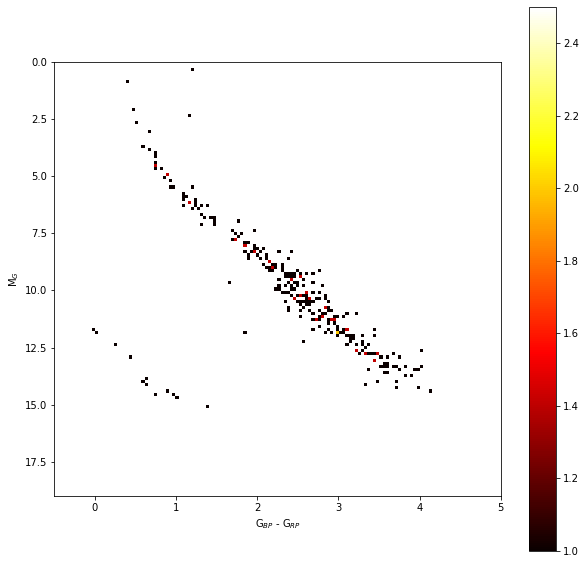

In [22]:
#build hr diagram
histogram, xedges, yedges = np.histogram2d(
   voy1_stars['bp_rp'], voy1_stars['g_abs'], bins=110)

histogram = np.ma.masked_where(histogram == 0.0, histogram) #map zero values
histogram = histogram.T #list bins with common y range

color_map = plt.cm.get_cmap("hot") #set colors for diagram
color_map.set_bad(color='white') #set color as white for masked values

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]] #bounding box in data

#plotting

plt.figure(figsize=(10, 10))

plt.imshow(np.sqrt(histogram), origin='lower', cmap=color_map,
    extent=extent, aspect=(extent[1]-extent[0])/(extent[3]-extent[2])
    )

plt.xlim(-0.5, 5)
plt.ylim(0, 19)

plt.colorbar()
plt.clim(1,2.5)

plt.xlabel('G$_{BP}$ - G$_{RP}$')
plt.ylabel('M$_G$')
plt.gca().invert_yaxis()
plt.savefig('voy1_stars_hr.png')

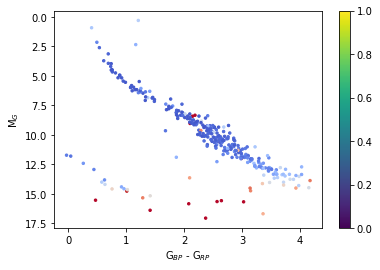

In [23]:
#color magnitude with stars removed from parallax error
cmap = plt.cm.get_cmap("coolwarm")
voy1_stars = pd.read_csv('voy1_results_error.csv')   #color magnitude including error stars

plt.scatter(voy1_stars['bp_rp'], voy1_stars['g_abs'], color = cmap(voy1_stars['parallax_error']*2), s = 6)

plt.colorbar()
plt.gca().invert_yaxis()

plt.xlabel('G$_{BP}$ - G$_{RP}$')
plt.ylabel('M$_G$')

plt.savefig("voy1_stars_error.png")

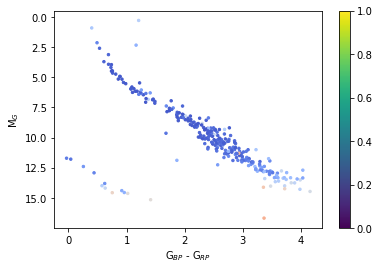

In [24]:
voy1_stars = voy1_stars[voy1_stars['parallax_error'] <= 0.35]     #With error filter of .35

cmap = plt.cm.get_cmap("coolwarm")

plt.scatter(voy1_stars['bp_rp'], voy1_stars['g_abs'], color = cmap(voy1_stars['parallax_error']*2), s = 6)

plt.colorbar()
plt.gca().invert_yaxis()

plt.xlabel('G$_{BP}$ - G$_{RP}$')
plt.ylabel('M$_G$')

plt.savefig("voy1_stars_error_removed.png")

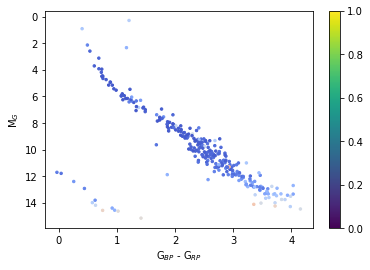

In [25]:
#color magnitude without stars removed from parallax error
voy1_stars = voy1_stars[voy1_stars['parallax_error'] <= 0.34]       #With error filter of .34

cmap = plt.cm.get_cmap("coolwarm")

plt.scatter(voy1_stars['bp_rp'], voy1_stars['g_abs'], color = cmap(voy1_stars['parallax_error']*2), s = 6)

plt.colorbar()
plt.gca().invert_yaxis()

plt.xlabel('G$_{BP}$ - G$_{RP}$')
plt.ylabel('M$_G$')

plt.savefig("voy1_stars_error_removed.png")

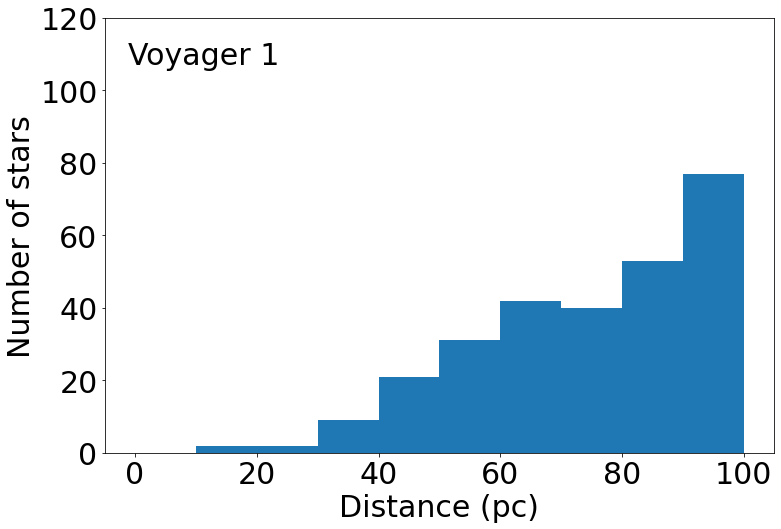

In [26]:
voy1_stars = pd.read_csv('voy1_results.csv') #distance histogram

plt.rcParams.update({'font.size': 30})
plt.figure(figsize=(12, 8))

plt.hist(abs(1000/voy1_stars['parallax']), bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]) #plot parallax (mas) converted to distance (pc) in histogram

plt.xlabel("Distance (pc)")
plt.ylabel("Number of stars")
plt.figtext(0.24, 0.8, "Voyager 1", wrap=True, horizontalalignment='center')

plt.ylim(0, 120)

plt.savefig("voy1_stars_dist.png")
plt.show()

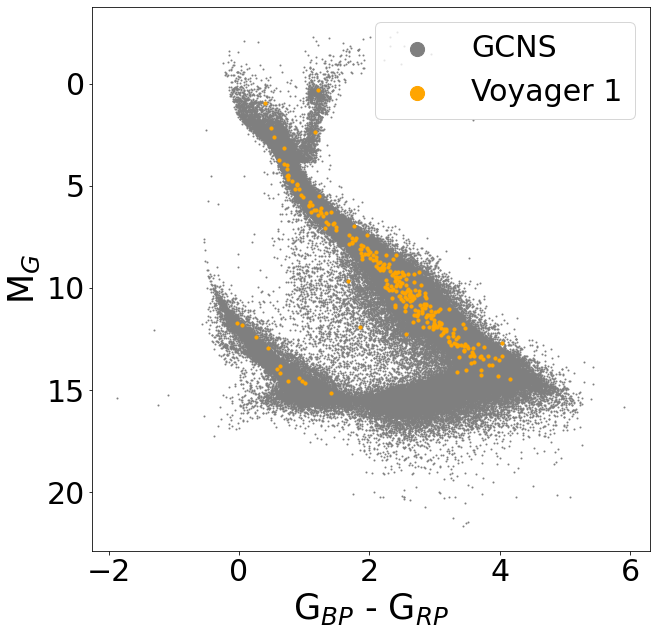

In [27]:
#HR with gcns in background

gcns = pd.read_csv('gcns_total.csv') #all stars in the GCNS database

plt.figure(figsize=(10, 10))

plt.scatter(gcns['bp_rp'], gcns['g_abs'], c = 'tab:gray', s = 1, label = "GCNS")
plt.scatter(voy1_stars['bp_rp'], voy1_stars['g_abs'], c = 'orange', s = 10, label = "Voyager 1")

plt.gca().invert_yaxis()
plt.xlabel('G$_{BP}$ - G$_{RP}$', fontsize=35)
plt.ylabel('M$_G$', fontsize=35)

lgnd = plt.legend(loc='upper right')
lgnd.legendHandles[0]._sizes = [200]
lgnd.legendHandles[1]._sizes = [200]

plt.savefig("voy1_superset_hr.png")
plt.show()

In [28]:
star_results = pd.read_csv('voy1_results.csv')
star_results_error = pd.read_csv('voy1_results_error.csv')

star_results['time_total'] = star_results['time_total']/86400 #convert total time from seconds to hours
star_results_error['time_total'] =  star_results_error['time_total']/86400

print(star_results)
print(star_results_error)

star_results.to_csv('voy1_results.csv')
star_results_error.to_csv('voy1_results_error.csv')

     Unnamed: 0            source_id          ra        dec      g_abs  \
0             0   149730638774998016   65.977215  25.620079   8.838866   
1            13   149737064046059648   66.038950  25.682469  13.239234   
2            26   149722117560581504   66.318832  25.646936  11.407697   
3            38   149726996642811904   66.282147  25.749320  10.048725   
4            50   149726790484381568   66.295392  25.749074   3.712664   
..          ...                  ...         ...        ...        ...   
272        7715  4540596097701725952  259.282543  12.207228  15.154395   
273        8499  4540584071792701952  259.350502  12.182394   7.857426   
274        8825  4541355069963293312  259.188804  12.452159  13.474532   
275        9714  4540604451415976704  259.285037  12.440392  11.750153   
276        9776  4540603626782252032  259.312658  12.428033  13.326698   

        bp_rp   parallax  parallax_error       dist                      date  \
0    2.231787  12.107674      